# Build a Better Tomorrow (Hackerearth)
### Name: Vishal Barman
### Team Name: Virtual Rider

In [1]:
from fastai.vision import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Fine-tuning a pre-trained model using progressive resizing

In [2]:
path = Path('../data')
path

PosixPath('/home/ncondo/.fastai/data/planet')

In [3]:
labels_df = pd.read_csv(data_path/'train_v2.csv')
labels_df.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

In [4]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [5]:
np.random.seed(14)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
      .split_by_rand_pct(0.2)
      .label_from_df(label_delim=' '))

In [1]:
bs=64

In [6]:
data = (src.transform(tfms, size=64)
       .databunch(bs=bs).normalize(imagenet_stats))

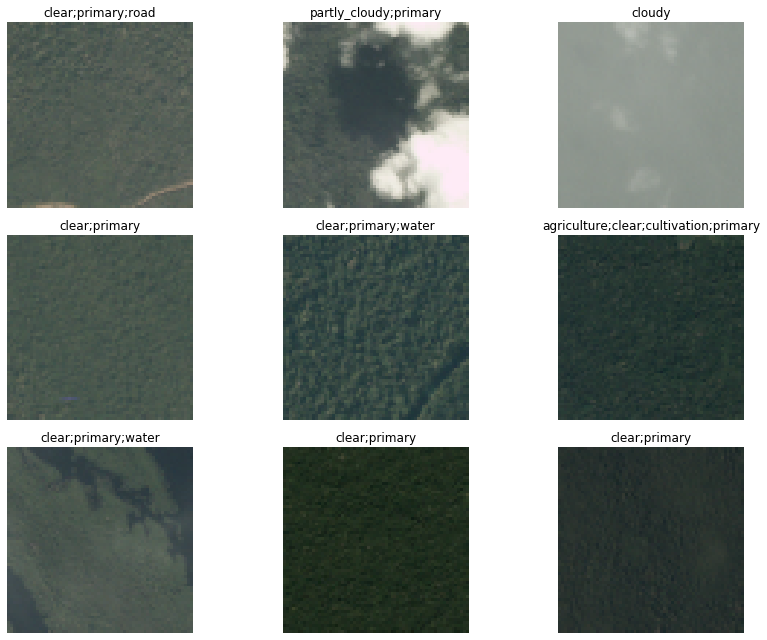

In [7]:
data.show_batch(rows=3, figsize=(12,9))

In [8]:
arch = models.resnet50
model_name = 'resnet50'

In [9]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [10]:
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


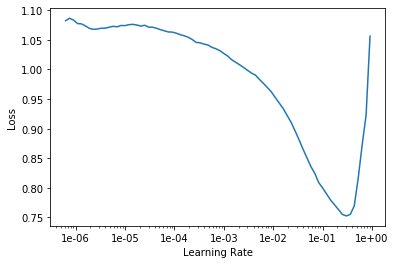

In [12]:
learn.recorder.plot()

In [13]:
lr = 0.01

In [14]:
learn.fit_one_cycle(5, slice(lr))

In [15]:
learn.save(model_name+'-stage-1-64')

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


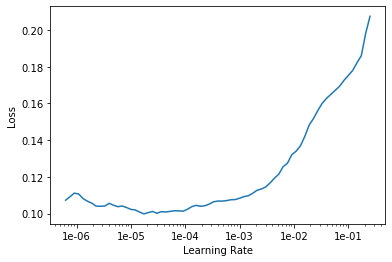

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [19]:
learn.save(model_name+'-stage-2-64')

In [20]:
data = (src.transform(tfms, size=128)
       .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

In [21]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


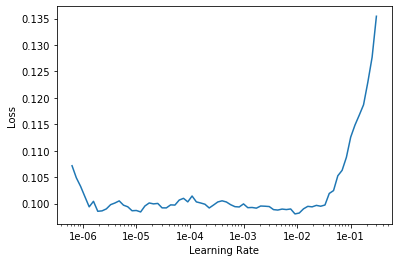

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
lr=1e-2/2

In [24]:
learn.fit_one_cycle(5, slice(lr))

In [25]:
learn.save(model_name+'-stage-1-128')

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [28]:
learn.save(model_name+'-stage-2-128')

In [29]:
data = (src.transform(tfms, size=256)
       .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [30]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


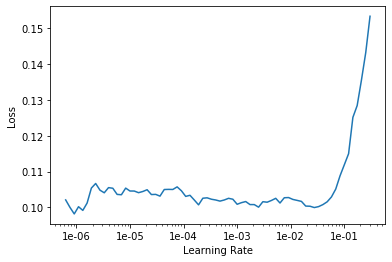

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
lr=1e-2/2

In [33]:
learn.fit_one_cycle(10, slice(lr))

In [34]:
learn.save(model_name+'-stage-1-256')

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

In [38]:
learn.save(model_name+'-stage-2-256')

In [39]:
learn.export(model_name)